# Requirements

In [1]:
!pip install -U accelerate
!pip install -U transformers[torch]
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
This laboratory assignment's primary objective is to fine-tune a pre-trained LLM for binary classification on a dataset consisting of wine reviews. The dataset contains two attributes: **description** and **points**. The description is a brief text describing the wine and the points represent a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

## The Wine Reviews Dataset

## Downloading the Wine Reviews Dataset



In [17]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Downloading...
From: https://drive.google.com/uc?id=1fz9449M9Owofy6CYrKzkGwXKesI32B8u
To: /content/wine-reviews.csv
100% 32.5M/32.5M [00:00<00:00, 102MB/s]


In [4]:
pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


## Exploring the Wine Reviews Dataset

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [18]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
df=pd.read_csv('/content/wine-reviews.csv')

In [19]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'points'}>]], dtype=object)

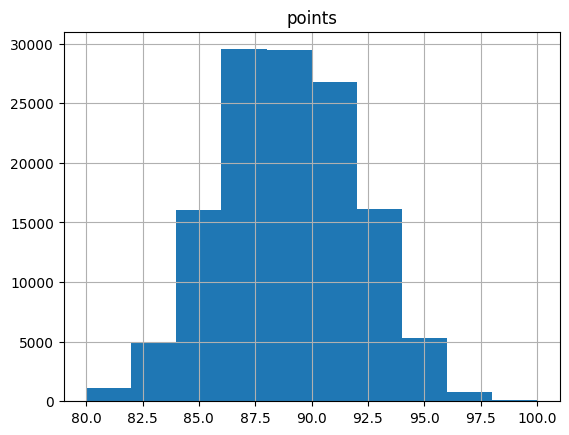

In [20]:
# Write your code here. Add as many boxes as you need.
df.hist()

## Feauture Extraction
Extract the feature **exceptional** for each wine review. If some wine has at least 90 points it is considered **exceptional**.

In [21]:
# Write your code here. Add as many boxes as you need.
df['exceptional'] = df['points'].apply(lambda x: 1 if x >= 90 else 0)

In [22]:
df.head()

,description,points,exceptional
0,"Aromas include tropical fruit, broom, brimston...",87,0
1,"This is ripe and fruity, a wine that is smooth...",87,0
2,"Tart and snappy, the flavors of lime flesh and...",87,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,0
4,"Much like the regular bottling from 2012, this...",87,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.


In [23]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
df.drop(columns=['points'], axis=1, inplace=True)

In [28]:
#mora da e kolonata krstena label za transformerot
df.columns=['description', 'label']

In [29]:
df.head()

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0


In [30]:
df_train, df_test=train_test_split(df, test_size=0.2)

Concat the training set's features and label into a single data frame `train_df`.

In [31]:
# Write your code here. Add as many boxes as you need.
df_train

,description,label
24093,This wine has a high-toned richness that prese...,1
65720,Altero opens with a dark garnet color and tigh...,1
19944,It's no disrespect to say this is a great fami...,0
24169,Reserva in the case of this wine means both a ...,0
46628,"A fresh wine, all berry flavors and ripe juici...",0
...,...,...
121791,Citrus and tropical-fruit aromas show snap in ...,0
70610,"Bready, slightly oxidized aromas of yeasty whi...",0
76826,"Bright and fruity, this is a light, mineral an...",0
3590,A good choice for those who like their rosés l...,0


Save the data frame `train_df`.

In [32]:
# Write your code here. Add as many boxes as you need.
df_train.to_csv('/content/train.csv',index=False)

Concat the testing set's features and label into a single data frame `test_df`.

In [33]:
# Write your code here. Add as many boxes as you need.
df_test.head()

,description,label
57266,"High-toned apples and pears and a grassy, herb...",0
77301,Castel's Blanc is always a well-made selection...,1
13051,"This blend of 60% Cabernet Sauvignon, 20% Shir...",1
77190,"While bountiful in ripe, plush nectarine, peac...",1
84784,"This smooth, supple Bordeaux-style blend is pr...",1


Save the data frame `test_df`.

In [35]:
# Write your code here. Add as many boxes as you need.
df_test.to_csv('/content/test.csv',index=False)

Load the `train_df` and `test_df` into a Hugging Face dataset.

https://huggingface.co/docs/datasets/index

In [36]:
# Write your code here. Add as many boxes as you need.
dataset = load_dataset("csv", data_files={"train": "train.csv", "test": "test.csv"})

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [37]:
dataset

DatasetDict({
    train: Dataset({
        features: ['description', 'label'],
        num_rows: 103976
    })
    test: Dataset({
        features: ['description', 'label'],
        num_rows: 25995
    })
})

## Tokenization
Tokenize the reviews using `AutoTokenizer`.

https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoTokenizer

In [41]:
# Write your code here. Add as many boxes as you need.
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [42]:
encoded_dataset = dataset.map(lambda t: tokenizer(t['description'],  truncation=True), batched=True,load_from_cache_file=False)

Map:   0%|          | 0/103976 [00:00<?, ? examples/s]

Map:   0%|          | 0/25995 [00:00<?, ? examples/s]

## Fine-tuning an LLM for Binary Classification
Fine-tune a pre-trained LLM model for binary classification on the dataset consisting of wine reviews.

Define the model using `AutoModelForSequenceClassification`.

https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoModelForSequenceClassification

In [43]:
# Write your code here. Add as many boxes as you need.
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Define the traning parameters using `TrainingArguments`.

https://huggingface.co/docs/transformers/v4.36.1/en/main_classes/trainer#transformers.TrainingArguments

In [51]:
# Write your code here. Add as many boxes as you need.
from transformers import TrainingArguments, Trainer
arg = TrainingArguments(
    "sentiment",
    learning_rate=5e-5,
    num_train_epochs=3,
    per_device_eval_batch_size=12,
    per_device_train_batch_size=12,
    seed=19
)

Define the training using `Trainer`.

https://huggingface.co/docs/transformers/v4.36.1/en/main_classes/trainer#transformers.Trainer

In [52]:
# Write your code here. Add as many boxes as you need.
trainer = Trainer(
    model=model,
    args=arg,
    tokenizer=tokenizer,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['test']
)

Fine-tune (train) the LLM.

In [53]:
# Write your code here. Add as many boxes as you need.
trainer.train()

Step,Training Loss
500,0.365900
1000,0.332900
1500,0.327100


Checkpoint destination directory sentiment/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory sentiment/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory sentiment/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.


KeyboardInterrupt: 

If the fine-tuning of the LLM is very time-consuming, you can use the `small_train_dataset` and `small_test_dataset` for training and testing. Just uncomment the code below.

In [50]:
small_train_dataset = encoded_dataset['train'].shuffle(seed=42).select(range(1000))
small_test_dataset = encoded_dataset['test'].shuffle(seed=42).select(range(1000))

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.
y_pred = trainer.predict(encoded_dataset['test'])

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import classification_report, f1_score
print(classification_report(predictions.label_ids, preds))
print(f'f1 score {f1_score(predictions.label_ids, preds)}')

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to embed the wine reviews using a Sentence Transformer (https://www.sbert.net/) and then cluster the embedded reviews.

## Requirements

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util

## Example Usage for a Sentence Transformer

In [ ]:
sentences = ['This is an example sentence.', 'Each sentence is converted into an embedding.']

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
embeddings = model.encode(sentences)

In [ ]:
print(embeddings)

In [ ]:
print(f'Similarity: {util.cos_sim(embeddings[0], embeddings[1])}')